### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [2]:
len(countries_no_infopopulation)

35

In [3]:
countries_no_infopopulation

['Taipei and environs',
 'Republic of the Congo',
 'North Ireland',
 'Saint Martin',
 'occupied Palestinian territory',
 'Vatican City',
 'The Gambia',
 'Guadeloupe',
 'East Timor',
 'Martinique',
 'Greenland',
 'Cayman Islands',
 'French Guiana',
 'Saint Barthelemy',
 'Aruba',
 'Macau',
 'Reunion',
 'Gibraltar',
 'Puerto Rico',
 'Guernsey',
 'The Bahamas',
 'Hong Kong',
 'Channel Islands',
 'Mayotte',
 'Ivory Coast',
 'Curacao',
 'Guam',
 'Faroe Islands',
 'Palestine',
 'Cape Verde',
 ' Azerbaijan',
 'Republic of Moldova',
 'Jersey',
 'St. Martin',
 'Others_and_ships']

### Number of covid-19 outbreak days 

In [4]:
rcParams['figure.figsize'] = 20, 10
len(data)

507

In [5]:
updated_date=files[-1].split('.')[0]
updated_date

'06-11-2021'

### COVID situation in the World is being changed by day
### ARE WE BEATING COVID-19?

The World still has 58277224.0 active cases

In last 7 days:  [58562013. 58436172. 58326860. 58268106. 58224008. 58243513. 58277224.]


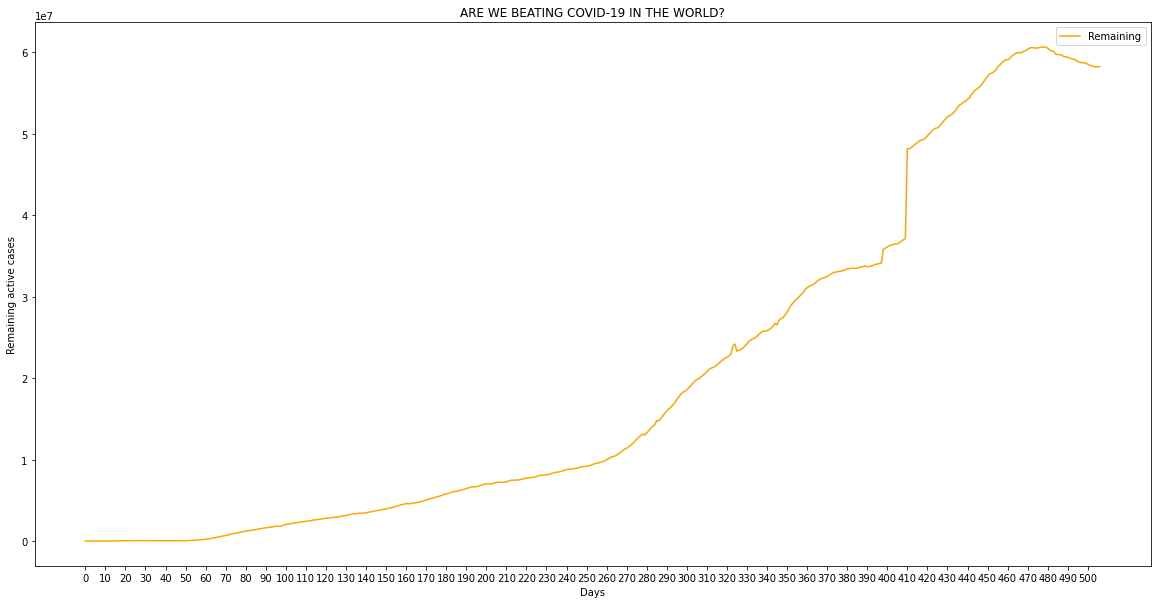

In [6]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [7]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
# Mitigate the negative values by converting all negative values to 0
countries_remaining.mask(countries_remaining<0, 0, inplace=True)

countries_remaining.tail(1)

,France,Italy,Gabon,Taipei and environs,Gambia,Singapore,Sweden,Ghana,Greece,Bangladesh,...,Namibia,Malawi,Peru,Mauritius,Netherlands,Cuba,Cameroon,Burkina Faso,Denmark,Others_and_ships
506,5286254.0,165239.0,839.0,0.0,15.0,412.0,1068882.0,1103.0,307809.0,47901.0,...,8099.0,603.0,0.0,313.0,1652911.0,6248.0,43519.0,21.0,10124.0,0.0


#### Notes: remaining number does not include the recovered data in US

In [8]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

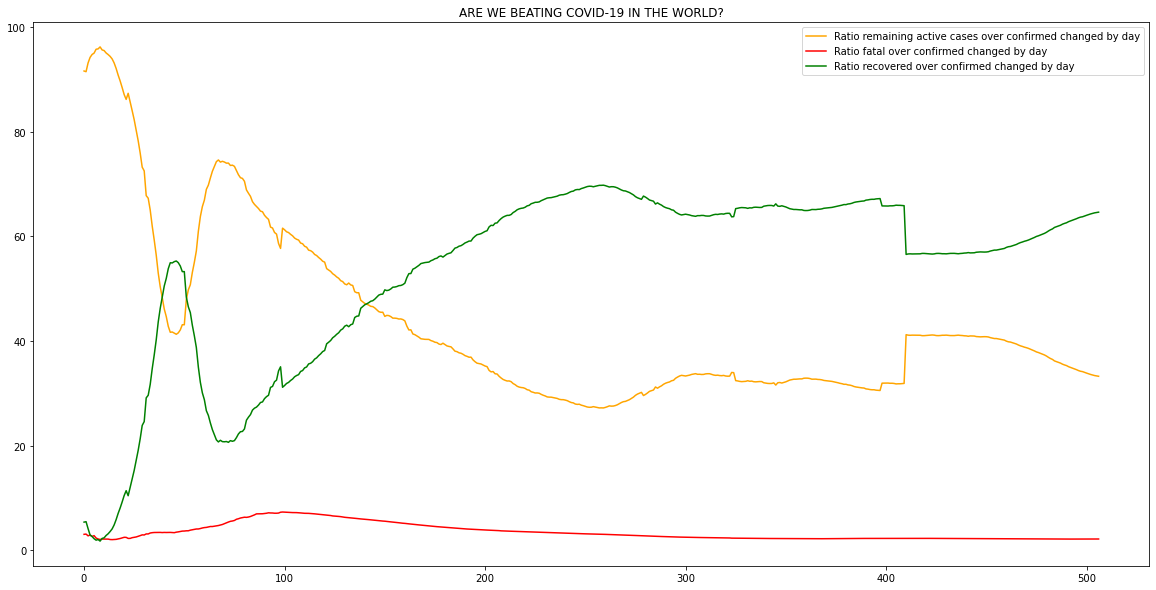

In [9]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Countries are beating COVID most

,506
Others_and_ships,0.0
East Timor,0.0
North Ireland,0.0
Saint Martin,0.0
occupied Palestinian territory,0.0
Holy See,0.0
Jersey,0.0
Republic of Moldova,0.0
Saint Barthelemy,0.0
Micronesia,0.0


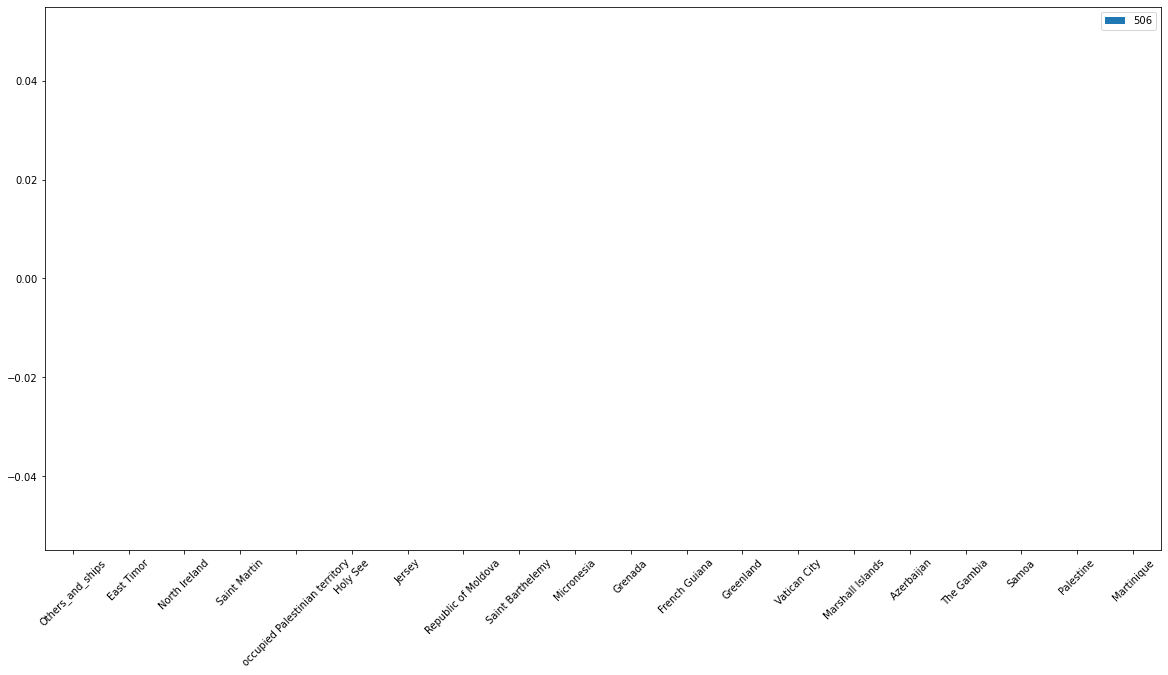

In [10]:
index = countries_remaining.tail(1)
top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

,Others_and_ships,East Timor,North Ireland,Saint Martin,occupied Palestinian territory,Holy See,Jersey,Republic of Moldova,Saint Barthelemy,Micronesia,Grenada,French Guiana,Greenland,Vatican City,Marshall Islands,Azerbaijan,The Gambia,Samoa,Palestine,Martinique
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


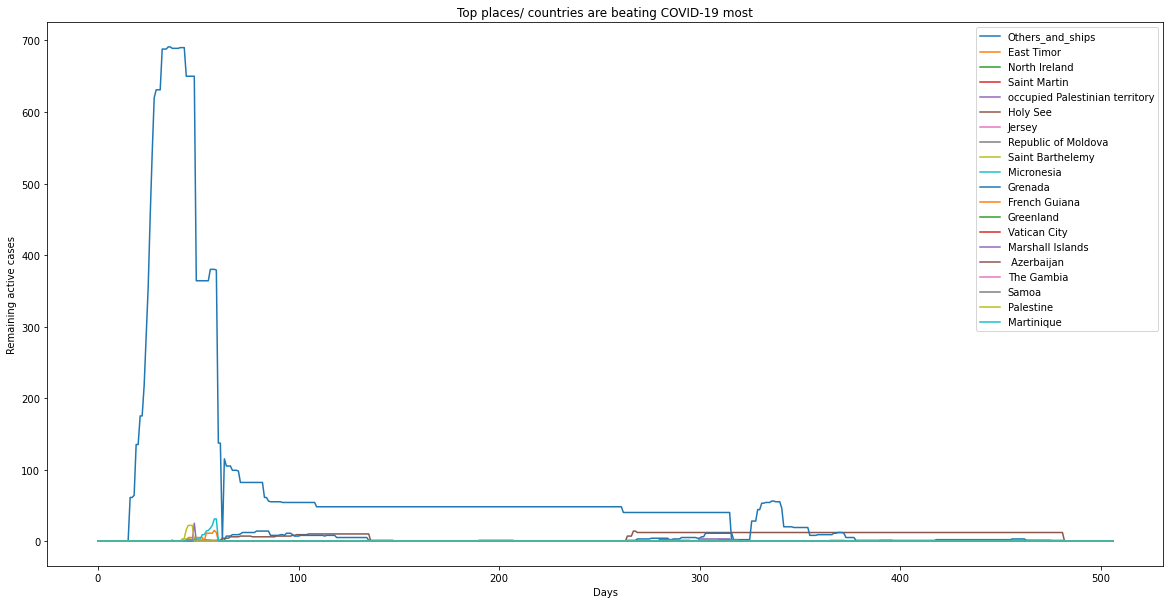

In [11]:
countries_remaining[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 most")
countries_remaining[top_remaining.index]

### Countries are beating COVID least

,506
US,32849728.0
France,5286254.0
United Kingdom,4423202.0
Spain,3502723.0
Netherlands,1652911.0
Brazil,1551424.0
India,1080690.0
Sweden,1068882.0
Belgium,1049913.0
Serbia,707683.0


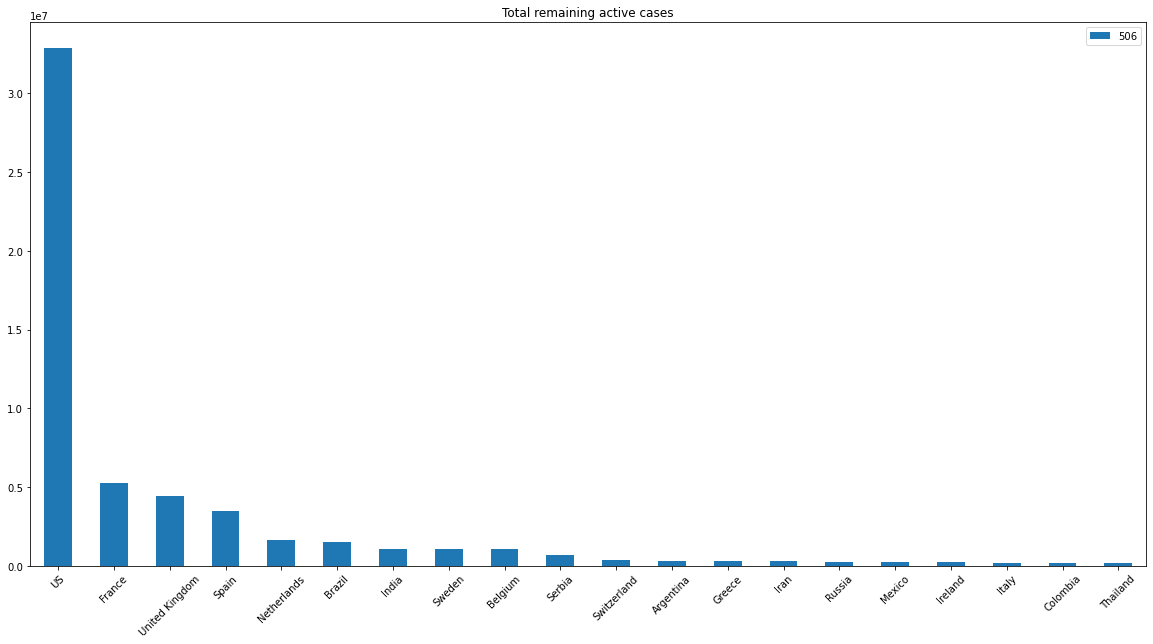

In [12]:
bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'Top places/ countries are beating COVID-19 least')

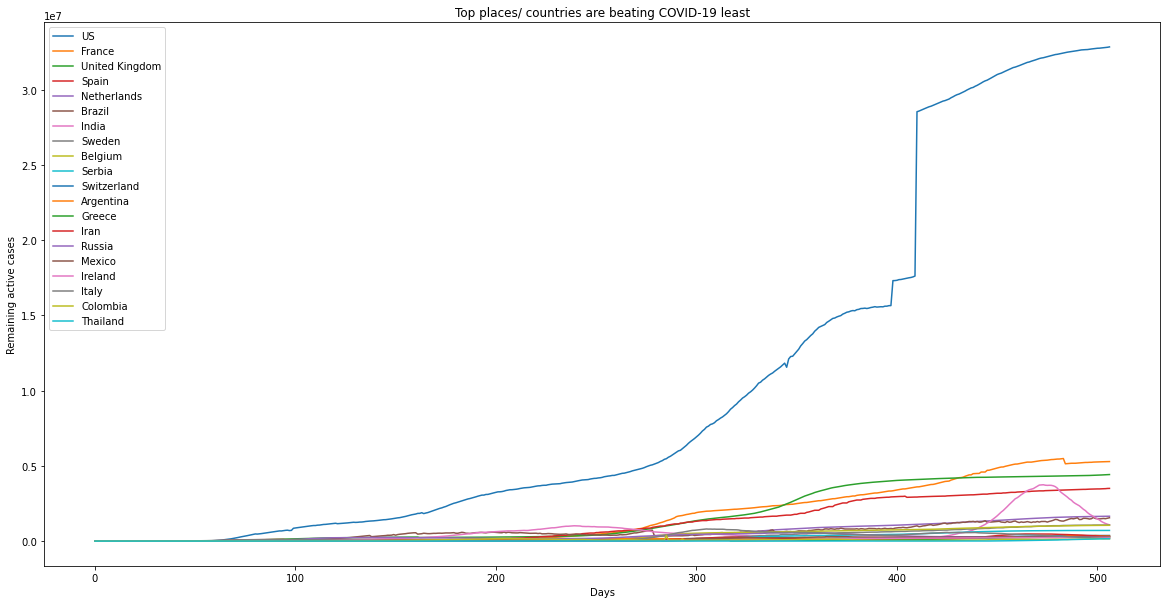

In [13]:
countries_remaining[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 least")

#### The current remaining days is not included with the recovered data from US. 
#### See: https://github.com/CSSEGISandData/COVID-19/issues/3464